# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


In [ ]:
# Load parquet file into a Pandas DataFrame
taxi_tripdata_df = pd.read_parquet ('yellow_tripdata_2022-01.parquet')

In [ ]:
# Display the first few rows of the dataset
print (taxi_tripdata_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


There are 2,463,931 rows in the dataset.  There are 19 unique columns in the dataset.

In [ ]:
# Display the shape of the dataset
print (taxi_tripdata_df.shape)

(2463931, 19)


Only 5 columns contain null values: 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', and 'airport_fee'.  Each of these columns contain 71,503 values.

In [ ]:
# Check for missing values
print (taxi_tripdata_df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64


As the describe() function call below indicates, the tpep_pickup_datetime column has a min value in the year 2008.  This is strange because this dataset is supposed to correspond exclusively to all taxi pickups and dropoffs in the New York City area as of January 2022.  But when I visit the NYC Taxi and Limousine Commission website, the records only go back to 2009 at the earliest.

My hypothesis is that 2008 records for taxi cab rides were not unearthed until January 2022 and just lumped into the most recent dataset at that time.  There may not have been sufficient 2008 outliers to justify the creation of a new parquet file, since the 25% quartile indicates taxi cab pickups and dropoffs in early January 2022, along with the mean and median dates.

In [ ]:
# Summary statistics of the dataset
print (taxi_tripdata_df.describe())

print (taxi_tripdata_df[taxi_tripdata_df['fare_amount'] > 400000])

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.463931e+06                     2463931                     2463931   
mean   1.707819e+00  2022-01-17 01:19:51.689724  2022-01-17 01:34:04.421902   
min    1.000000e+00         2008-12-31 22:23:09         2008-12-31 23:06:56   
25%    1.000000e+00         2022-01-09 15:37:41  2022-01-09 15:50:50.500000   
50%    2.000000e+00         2022-01-17 12:11:45         2022-01-17 12:23:49   
75%    2.000000e+00  2022-01-24 13:49:37.500000         2022-01-24 14:02:51   
max    6.000000e+00         2022-05-18 20:41:57         2022-05-18 20:47:45   
std    5.021375e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.392428e+06   2.463931e+06  2.392428e+06  2.463931e+06   
mean      1.389453e+00   5.372751e+00  1.415507e+00  1.660768e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [ ]:
# Drop rows with missing values.
taxi_tripdata_no_missing_rows = taxi_tripdata_df.dropna (how = "any")
# print (taxi_tripdata_no_missing_rows.shape)

Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

In [35]:
# Create a new column for trip duration in minutes
diff = taxi_tripdata_no_missing_rows.loc[:, 'tpep_dropoff_datetime'] - taxi_tripdata_no_missing_rows.loc[:, 'tpep_pickup_datetime']
# Subtract the pickup datetime from the dropff datetime to get a timedelta.  Then, convert that delta into seconds and divide by 60.
# Docs for getting the total number of seconds from a Series of time delta objects: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.total_seconds.html
taxi_tripdata_no_missing_rows.loc[:, 'trip_duration'] = diff.dt.total_seconds() / 60

# print (taxi_tripdata_no_missing_rows.loc[:, ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head())

In [36]:
# Create new columns for pickup hour and day of week
# Docs for getting the day of the week from a Series of date-times: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html
taxi_tripdata_no_missing_rows.loc[:, 'pickup_weekday'] = taxi_tripdata_no_missing_rows.loc[:, 'tpep_pickup_datetime'].dt.dayofweek
# Docs for getting the hours from a Series of date-times: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
taxi_tripdata_no_missing_rows.loc[:, 'pickup_hour'] = taxi_tripdata_no_missing_rows.loc[:, 'tpep_pickup_datetime'].dt.hour

# print (taxi_tripdata_no_missing_rows.loc[:, ['tpep_pickup_datetime', 'pickup_weekday', 'pickup_hour']].head())

<Axes: xlabel='pickup_hour', ylabel='pickup_frequency'>

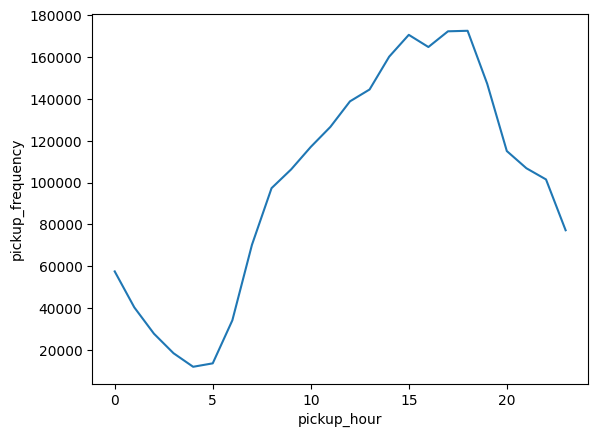

In [ ]:
# Create a lineplot displaying the number of trips by pickup hour
# Get the number of pickups per hour of the day via value_counts(), but the frequency for each hour becomes the 'index' column of this new table,
# so use reset_index() to make the index a separate column from our desired frequencies, to which we give their own column name.
freq_by_hour_df = taxi_tripdata_no_missing_rows.loc[:, 'pickup_hour'].value_counts().reset_index(name='pickup_frequency')
# Now that we have a two-column dataframe of hours and frequencies, we can just plot them in the x and y axes via sns.lineplot.
# Per the line plot, the busiest time of day is late afternoon, roughly 3pm to 7pm.
sns.lineplot(data = freq_by_hour_df, x = 'pickup_hour', y = 'pickup_frequency')

<Axes: xlabel='pickup_weekday', ylabel='pickup_frequency'>

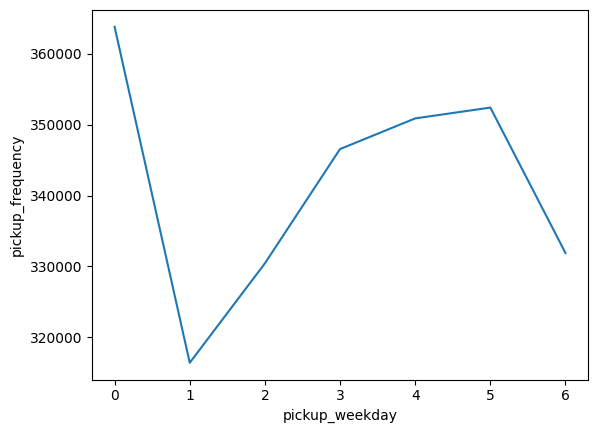

In [ ]:
# Create a lineplot displaying the number of trips by pickup day
# Same sns trick as for pickups by hour, where we pull value_counts(), rename the index into its own column, and plug the two columns as axes into sns.lineplot.
freq_by_weekday_df = taxi_tripdata_no_missing_rows['pickup_weekday'].value_counts().reset_index(name='pickup_frequency')
# Per the lineplot, the least busy day of the week is Tuesday.
sns.lineplot(data = freq_by_weekday_df, x = 'pickup_weekday', y = 'pickup_frequency')

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

As the correlation matrix and heatmap confirm in my code below, the strongest correlations exist between total_amount and fare_amount.  There is a medium correlation between the trip_distance and the driver's tip, but most of the payment is from the standard fare charge.

<Axes: >

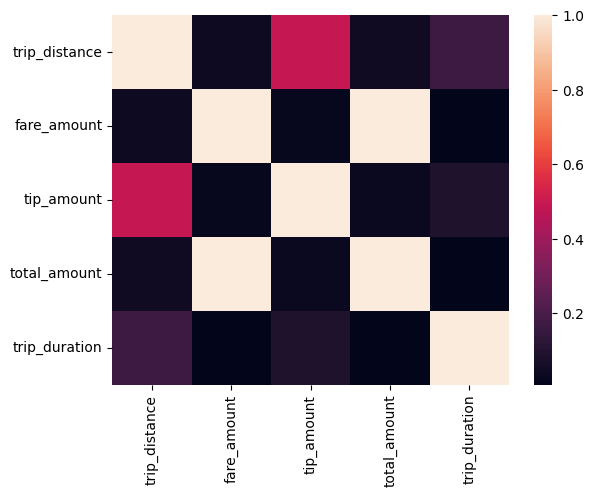

In [ ]:
# Compute correlation matrix of numerical variables
taxi_corrs = taxi_tripdata_no_missing_rows.loc[:, ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].corr()
# print (taxi_corrs)

# Create a heatmap of the correlation matrix
sns.heatmap(data = taxi_corrs)

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

There appears to be a very strong relationship between fare_amount and total_amount.  There also appears to be a moderate correlation between total_amount and trip_distance.  The trip_duration variable has little to no correlation to all other variables: trip_distance, fare_amount, tip_amount, and total_amount.

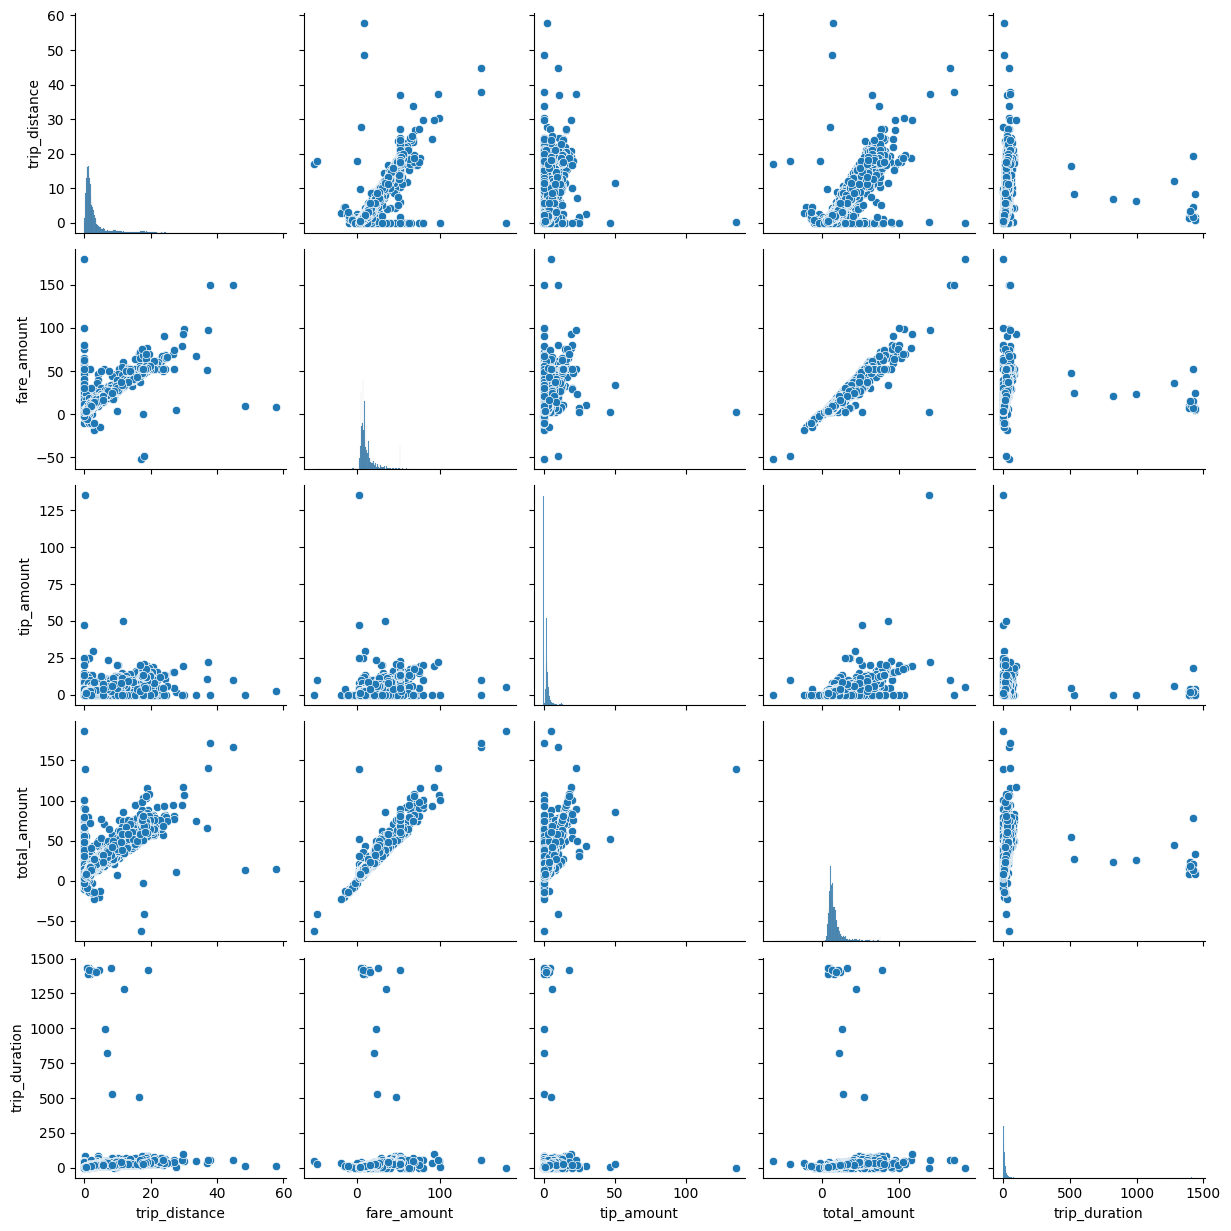

In [ ]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
sns.pairplot (data = taxi_tripdata_no_missing_rows.sample(10000), kind="scatter",\
  x_vars = ["trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration"],\
  y_vars=["trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration"]\
)

A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

As the countplot below indicates, Pickup Location 237 is the most popular one by a narrow margin.

<Axes: xlabel='destination_id', ylabel='count'>

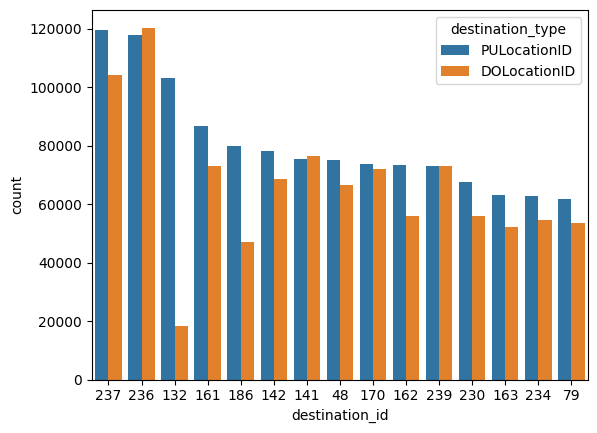

In [ ]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.
# Note that value_counts already sorts the most frequent pickup and drop-off id's from most to least frequent, so we just sample the first 15.
most_popular_locations = taxi_tripdata_no_missing_rows.loc[:, 'PULocationID'].value_counts().head(15)

# Countplot can handle more than one variable but only accepts one x-variable for plotting purposes.  A trick I found on this article:
# https://www.geeksforgeeks.org/normalizing-seaborn-countplot-with-multiple-categorical-variables/#
# is to call the melt function to stack the PULocationID and DOLocationID columns vertically.  The second column indicates whether the ID
# is a pickup location id or a dropoff location id and is purely categorical.  The third column indicates the id itself.
# For clarity, I renamed the second column to 'destination_type' and will pass it into the 'hue' argument for countplot below.
# The third column I renamed to 'destination_id' and will be the 'x' value that the countplot will actually count for both categories.
pickup_and_dropoff_in_two_columns = taxi_tripdata_no_missing_rows.loc[:, ['PULocationID', 'DOLocationID']].melt(var_name = 'destination_type', value_name = 'destination_id')

# Countplot is tricky because you cannot pass both x and y variables into one.  I tried to plot the value_counts table as a bar plot using countplot,
# but this led to fifteen bar plots ALL the same height because each id only appears in a single row.
# What we need is for each of the PULocationID's to appear in the data in for as many rows as the value_counts indicates so that countplot would actually
# count the rows.  After searching StackOverflow: https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot/31460312#31460312
# However, you can pass the PULocationID's from the value_counts function as a list of strings into the *order* parameter of countplot.  This sorts the
# top 15 PULocationID's from most to least popular, and because we are passing our dataframe into data, the countplot will set each bar to the correct height.
sns.countplot(data = pickup_and_dropoff_in_two_columns, x = 'destination_id', hue = 'destination_type', order = most_popular_locations.index)

A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?

For the first three payment categories, the payment values fall between 0 and 50 dollars, for the most part.  However, a single outlier of a six-figure monetary value squishes ALL the boxplots into a razor-thin width.  In the log-scale boxplot, the point registers at a value near 2^19 or $524,000.  To make the boxplots appear as such, set the 'log_scale' argument greater than 1.  The outlier is of payment_type 4, which according to https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf, suggests a payment_type of "dispute".

If you uncomment my "print" statement below, you obtain the row data for the taxi ride with a fare_amount of $400,000.  The pickup and dropoff dates indicate a ride lasting approximately ten minutes and a passenger_count of 1.  

The data on the row looks reasonable aside from the fare_amount, so I believe this is a genuine outlier.

I found a CSV file showing the location corresponding to each ID here: https://catalog.data.gov/dataset/nyc-taxi-zones.  The PULocation has an ID of 107, or Gramercy Park.  The DOLocation has an ID Of 140 or Lenox Hill.  Both locations are known to be upscale and to attract the affluent.

I can only speculate as to the nature of this 'dispute', but I found that many taxi cab drivers suffer from staggering financial debt.  One such example is this article pushing for financial relief from cab driving permits costing upwards of $150,000: https://hrlr.law.columbia.edu/hrlr-online/distressed-drivers-solving-the-new-york-city-taxi-medallion-debt-crisis/

A handful of drivers pursued litigation and won: https://nysfocus.com/2024/09/03/taxi-drivers-debt-lenders-mpr-plus

My best guess is that the outlier represents debt relief from a city representative paid just after a taxi ride.

<Axes: xlabel='total_amount'>

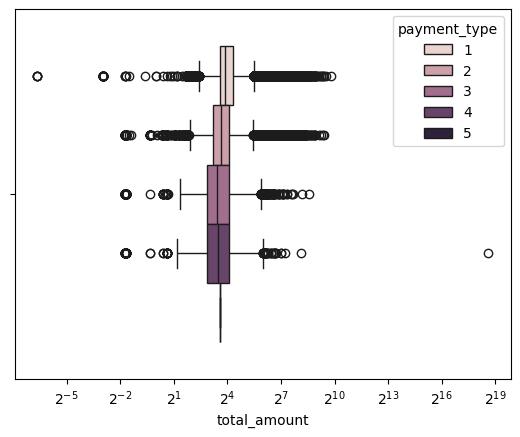

In [ ]:
# Create a box plot of total amount by payment type. Do you see anything odd?
sns.boxplot (data = taxi_tripdata_no_missing_rows.loc[:, ['total_amount', 'payment_type']], log_scale = 2, x = 'total_amount', hue = 'payment_type')

# Print statement to uncomment and see the outlier:
# print (taxi_tripdata_df[taxi_tripdata_df['fare_amount'] > 400000])

A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

<Axes: xlabel='count', ylabel='Count'>

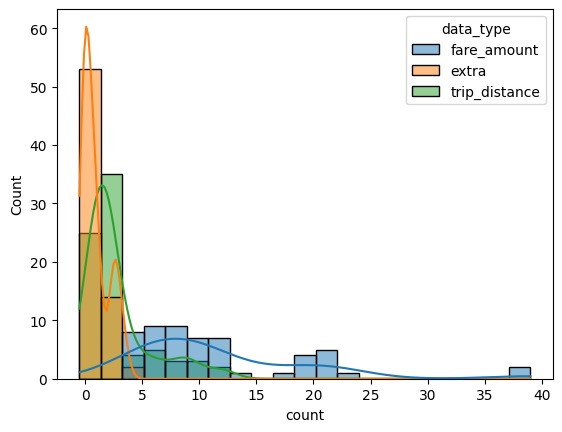

In [ ]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.
# A smaller sample size also helps with the relative scales of the graph, since some bars will grow disproportionately tall and cause the whole histogram to "zoom out".
# Changing the graph to a logarithmic scale won't work because many values under the 'extra' variable equal 0, and there is no pair of natural numbers x, y > 0, such that x^y = 0.
# The question above says "Use kernel density estimators to better visualize the distribution", so I set the kde argument of histplot to equal True.
# If we also change log_scale, then we'll either get -Infinity related errors or the graph will not scale well (eg. the y-axis will range from 2^-93 to 2^-8...)
# For these reasons, a sample size of 200 is the best way to obtain a readable histplot with a readable kernel density estimator.
SAMPLE_SIZE = 200
distributions_in_two_columns = taxi_tripdata_no_missing_rows.loc[:, ['fare_amount', 'trip_distance', 'extra']].melt(var_name = 'data_type', value_name = 'count')
sns.histplot(data = distributions_in_two_columns.sample(SAMPLE_SIZE), x = 'count', hue = 'data_type', kde = True) # log_scale = (False, 2) # Do not set any log scale for the x-axis.